In [11]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

In [12]:
# loadind the data
data=pd.read_csv('C:/Users/Srinivas/Downloads/Desktop/health care.csv')

In [13]:
data.head()

,Facility Type,Borough,Facility Name,Phone,Postcode,Number of Sub Centres,Number of Sub Divisional Hospitals,Number of District Hospital
0,Child Health Center,Queens,Elmhurst Hospital Center,718-334-4000,11373,41,0,1
1,Nursing Home,Manhattan,Gouverneur Healthcare Services,212-238-7000,10002,43,0,1
2,Nursing Home,Manhattan,Coler-Goldwater Specialty Hospital and Nursing...,212-318-8000,10044,39,0,1
3,Nursing Home,Manhattan,Coler-Goldwater Specialty Hospital and Nursing...,212-848-6000,10044,123,0,3
4,Diagnostic & Treatment Center,Manhattan,Gouverneur Healthcare Services,212-238-7000,10002,609,3,0


In [14]:
data.tail()

,Facility Type,Borough,Facility Name,Phone,Postcode,Number of Sub Centres,Number of Sub Divisional Hospitals,Number of District Hospital
73,Child Health Center,Manhattan,La Clinica Del Barrio,212-410-7940,10035,440,2,1
74,Child Health Center,Brooklyn,Bushwick Community Health Center,718-919-1200,11207,186,1,1
75,Diagnostic & Treatment Center,Bronx,Morrisania Diagnostic & Treatment Center,718-960-2777,10452,279,0,1
76,Child Health Center,Bronx,Jacobi Medical Center,718-918-5000,10461,92,0,1
77,Child Health Center,Queens,Ridgewood Communicare Clinic,718-334-6190,11385,197,1,1


In [15]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
Facility Type                         78 non-null object
Borough                               78 non-null object
Facility Name                         78 non-null object
Phone                                 78 non-null object
Postcode                              78 non-null int64
Number of Sub Centres                 78 non-null int64
Number of Sub Divisional Hospitals    78 non-null int64
Number of District Hospital           78 non-null int64
dtypes: int64(4), object(4)
memory usage: 5.0+ KB


In [16]:
#columns values in the data
data.columns

Index(['Facility Type', 'Borough', 'Facility Name', 'Phone', 'Postcode',
       'Number of Sub Centres ', 'Number of Sub Divisional Hospitals',
       'Number of District Hospital'],
      dtype='object')

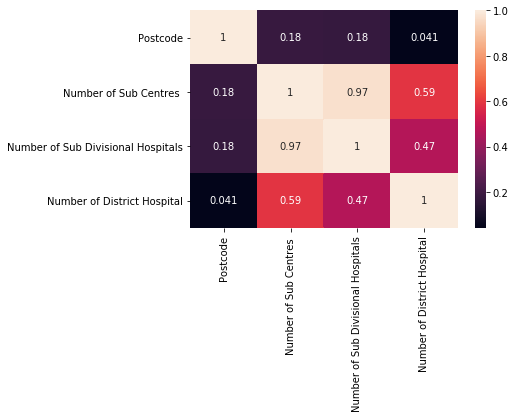

In [17]:
#finding correlation values
sns.heatmap(data.corr(),annot=True)

# visualizations

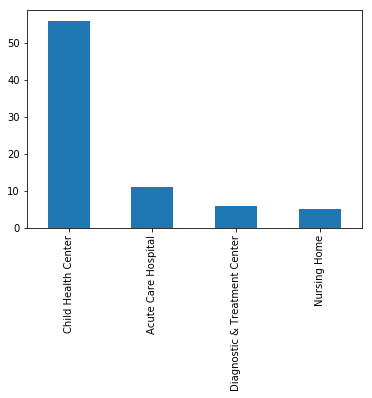

In [18]:
#finding the number of facility types
data['Facility Type'].value_counts().plot.bar()

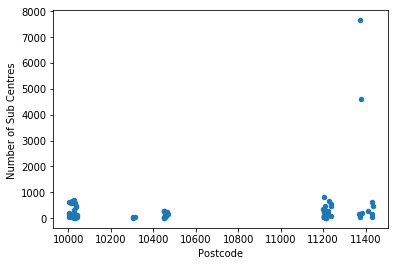

In [19]:
#visualize using scatterplot
data.plot.scatter('Postcode','Number of Sub Centres ')

In [20]:
data['Number of Sub Centres '].sum()

29187

Text(0.5, 1.0, 'number of sub centres with respect to postcode')

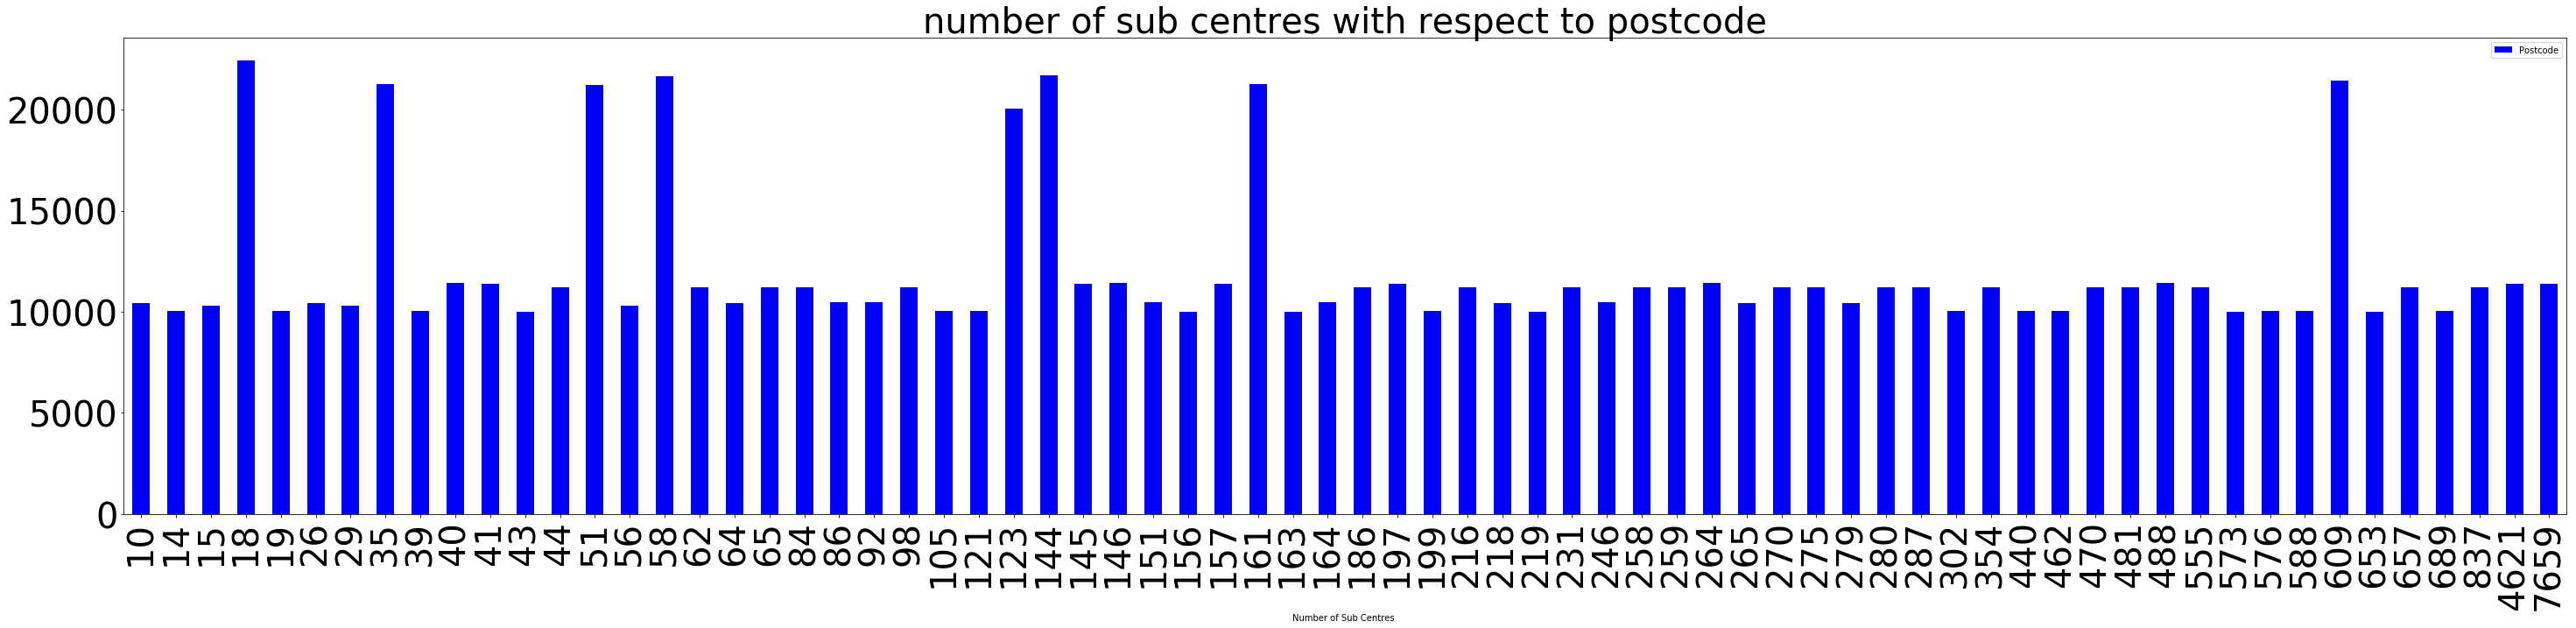

In [21]:
#visualizing number of subcentres with help of postcode
nscp = data[['Postcode','Number of Sub Centres ']].groupby(['Number of Sub Centres ']).sum()
nscp.plot(kind='bar',figsize=(50,10), fontsize=40,color='blue').set_title('number of sub centres with respect to postcode',fontsize=40)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

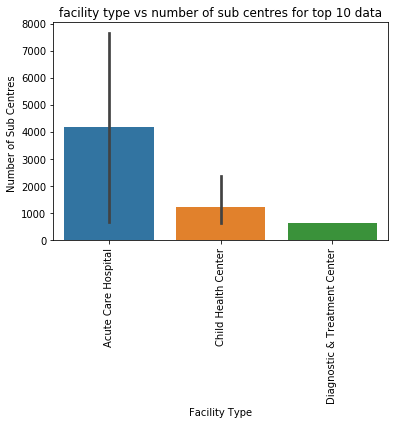

In [22]:
#plotting bottom data which the facility type are more in number of subcentre
facility_number = data.reset_index().sort_values(by='Number of Sub Centres ', ascending=False)
top5 = facility_number[:10]
sns.barplot(x='Facility Type', y='Number of Sub Centres ', data=top5).set_title('facility type vs number of sub centres for top 10 data')
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

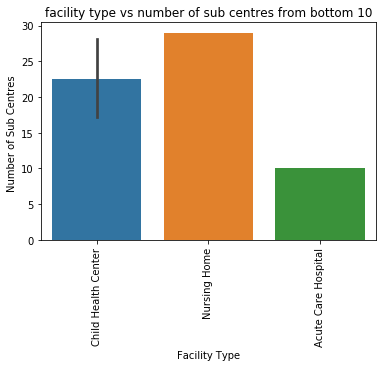

In [23]:
#plotting data which the facility type are less in number of subcentres
facility_number = data.reset_index().sort_values(by='Number of Sub Centres ', ascending=False)
bottom = facility_number[-10:]
sns.barplot(x='Facility Type', y='Number of Sub Centres ', data=bottom).set_title('facility type vs number of sub centres from bottom 10')
plt.xticks(rotation=90)

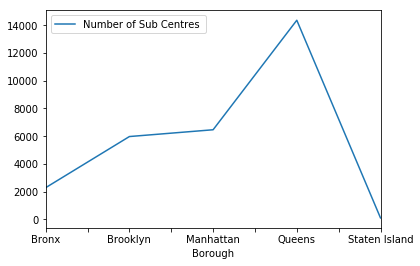

In [24]:
data[['Borough','Number of Sub Centres ']].groupby(['Borough']).sum().plot()

Text(0.5, 1.0, 'borough vs number of sub centres')

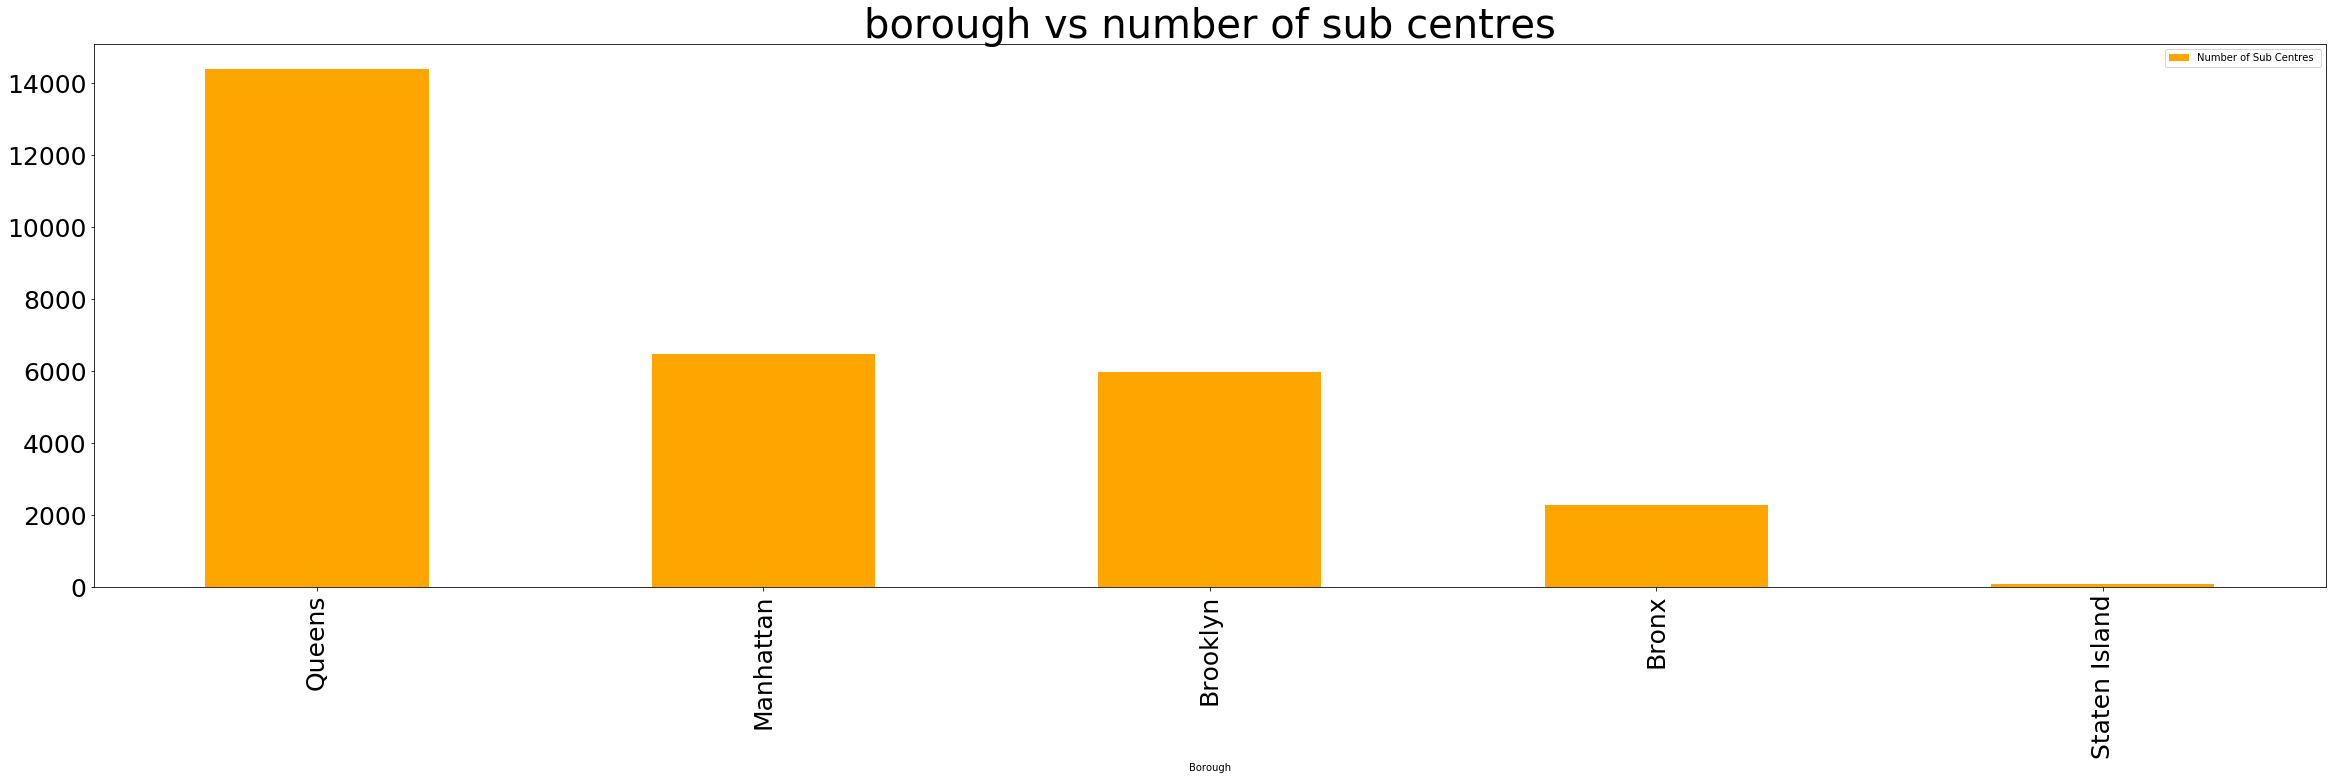

In [25]:
#visualizing the plot between number of subcentres and borough
facility_number = data[['Borough','Number of Sub Centres ']].groupby(['Borough']).sum().sort_values(by='Number of Sub Centres ', ascending=False)
facility_number.plot(kind='bar', figsize=(40,10), fontsize=25,color='orange').set_title('borough vs number of sub centres',fontsize=40)

(<Figure size 1440x720 with 3 Axes>,
 OrderedDict([(('Child Health Center', 'Queens'),
               (0.0, 0.0, 0.707338638373121, 0.1585996240601504)),
              (('Child Health Center', 'Manhattan'),
               (0.0,
                0.16188909774436092,
                0.707338638373121,
                0.2819548872180451)),
              (('Child Health Center', 'Brooklyn'),
               (0.0,
                0.44713345864661663,
                0.707338638373121,
                0.35244360902255645)),
              (('Child Health Center', 'Bronx'),
               (0.0,
                0.8028665413533836,
                0.707338638373121,
                0.15859962406015038)),
              (('Child Health Center', 'Staten Island'),
               (0.0,
                0.9647556390977445,
                0.707338638373121,
                0.03524436090225563)),
              (('Nursing Home', 'Queens'),
               (0.7122647467475053, 0.0, 0.06315523556902866, 0.0))

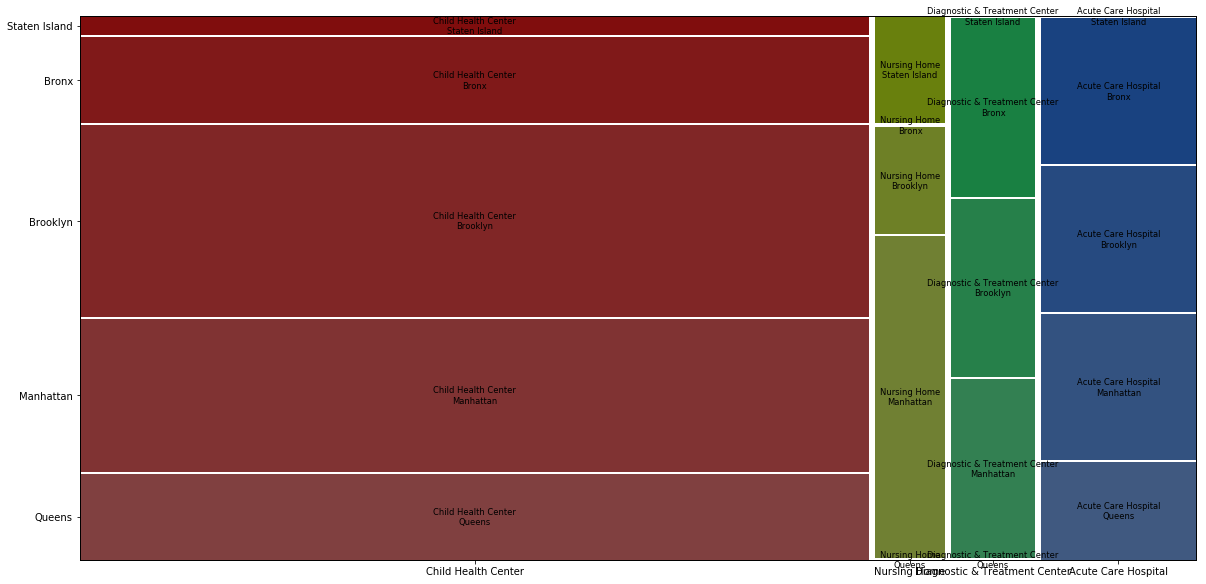

In [26]:
#plotting relation between facility type and borough
from statsmodels.graphics.mosaicplot import mosaic
from pylab import rcParams
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 10.0
mosaic(data, ['Facility Type', 'Borough'])

[]

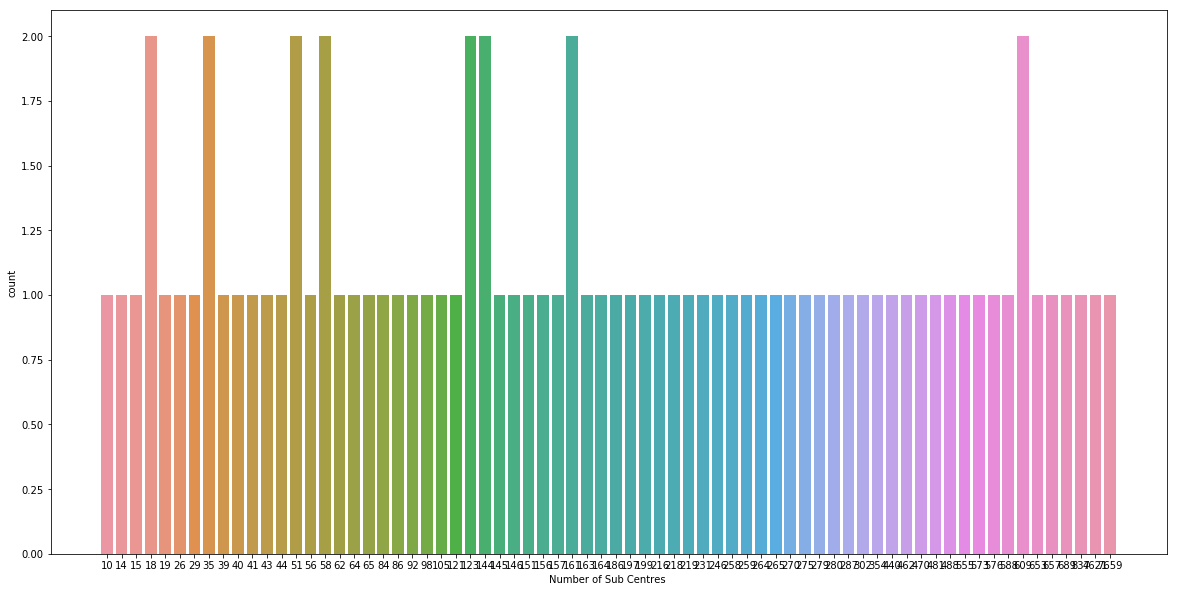

In [27]:
sns.countplot(data['Number of Sub Centres ']).plot()

Text(0.5, 1.0, 'Facility names with respect to postcode')

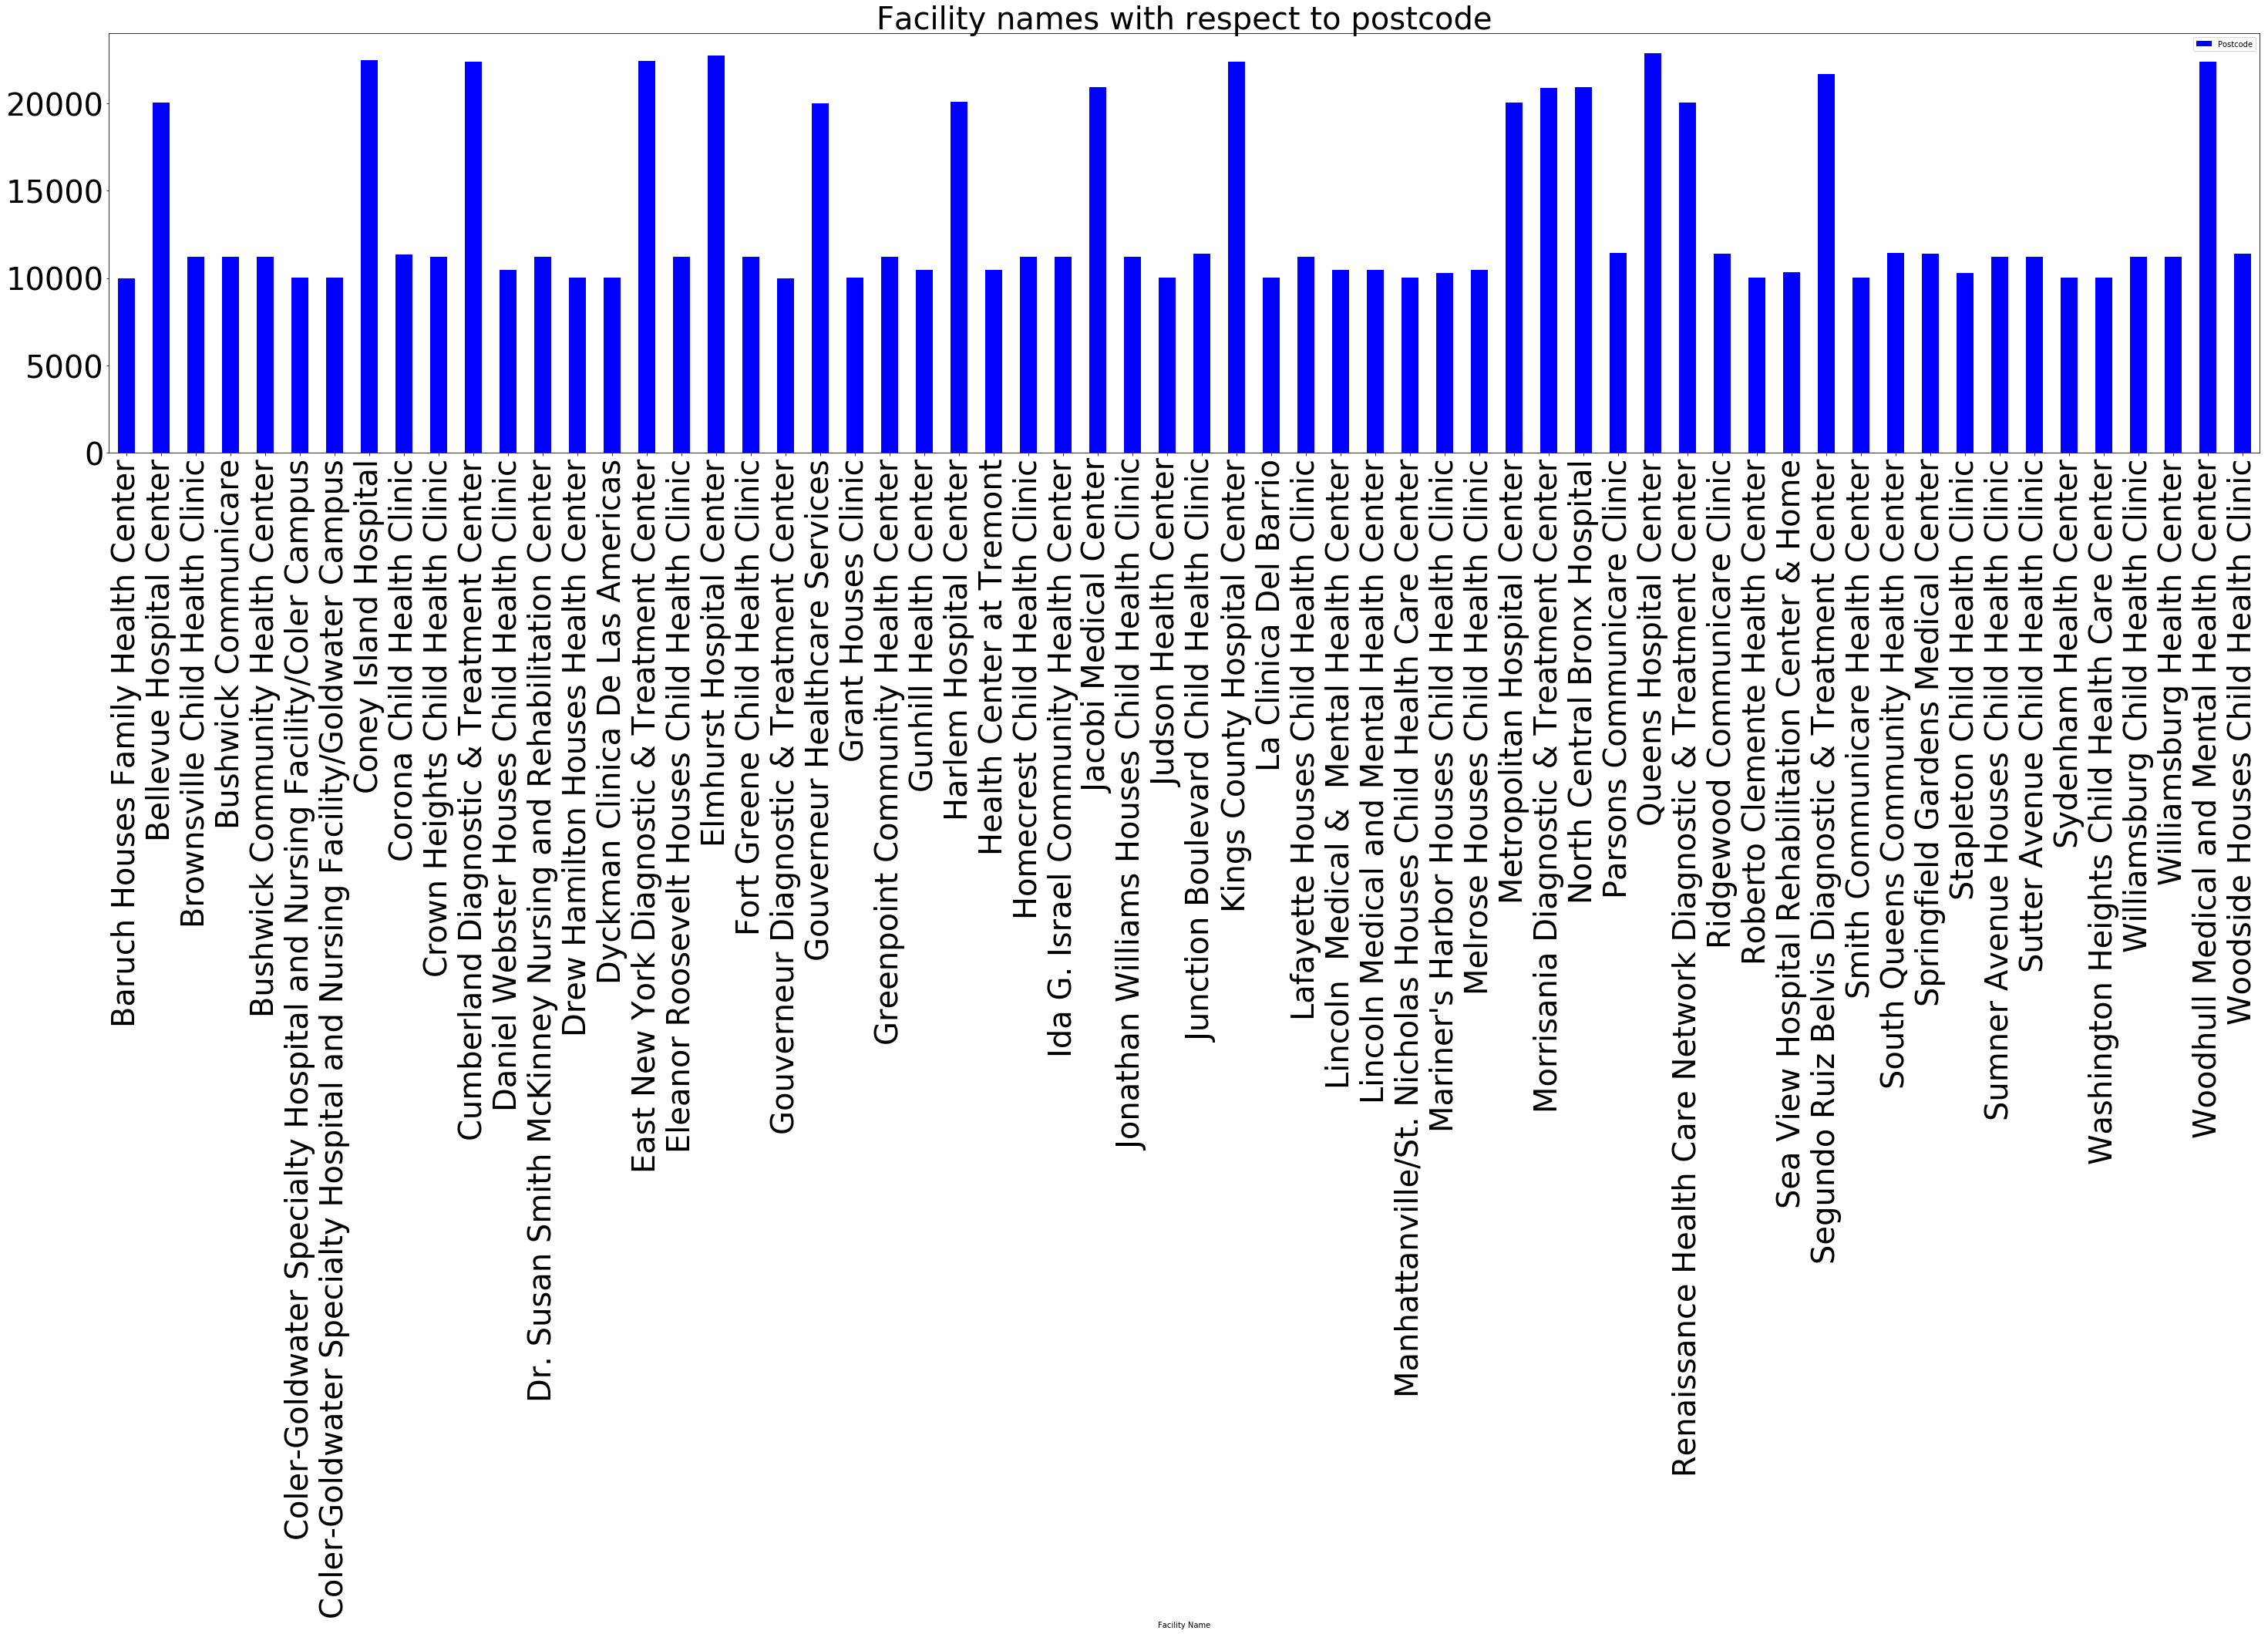

In [28]:
#visualizing Facility Names with help of postcode
nscp = data[['Postcode','Facility Name']].groupby(['Facility Name']).sum()
nscp.plot(kind='bar',figsize=(50,10), fontsize=40,color='blue').set_title('Facility names with respect to postcode',fontsize=40)

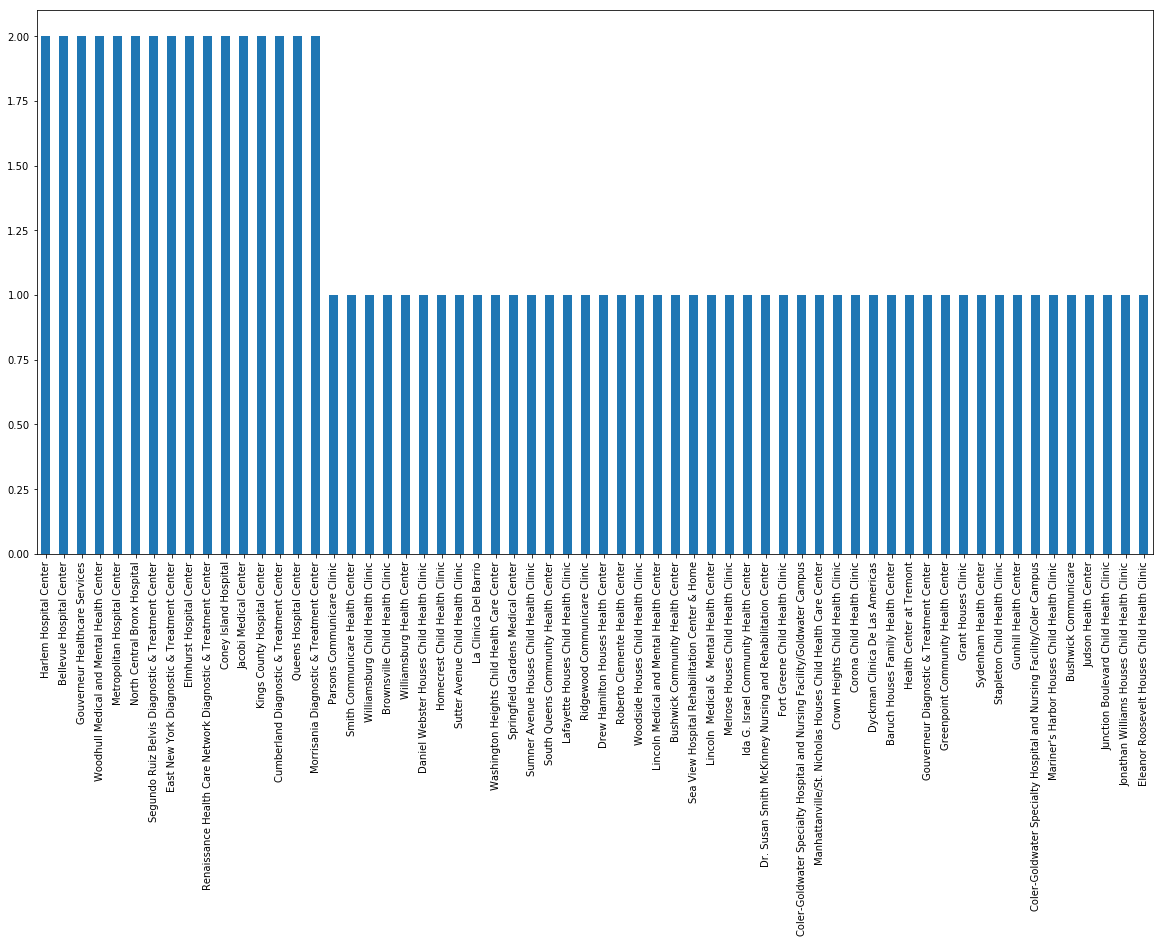

In [29]:
data['Facility Name'].value_counts().plot.bar()

Text(0.5, 1.0, 'Facility Type vs number of sub centres')

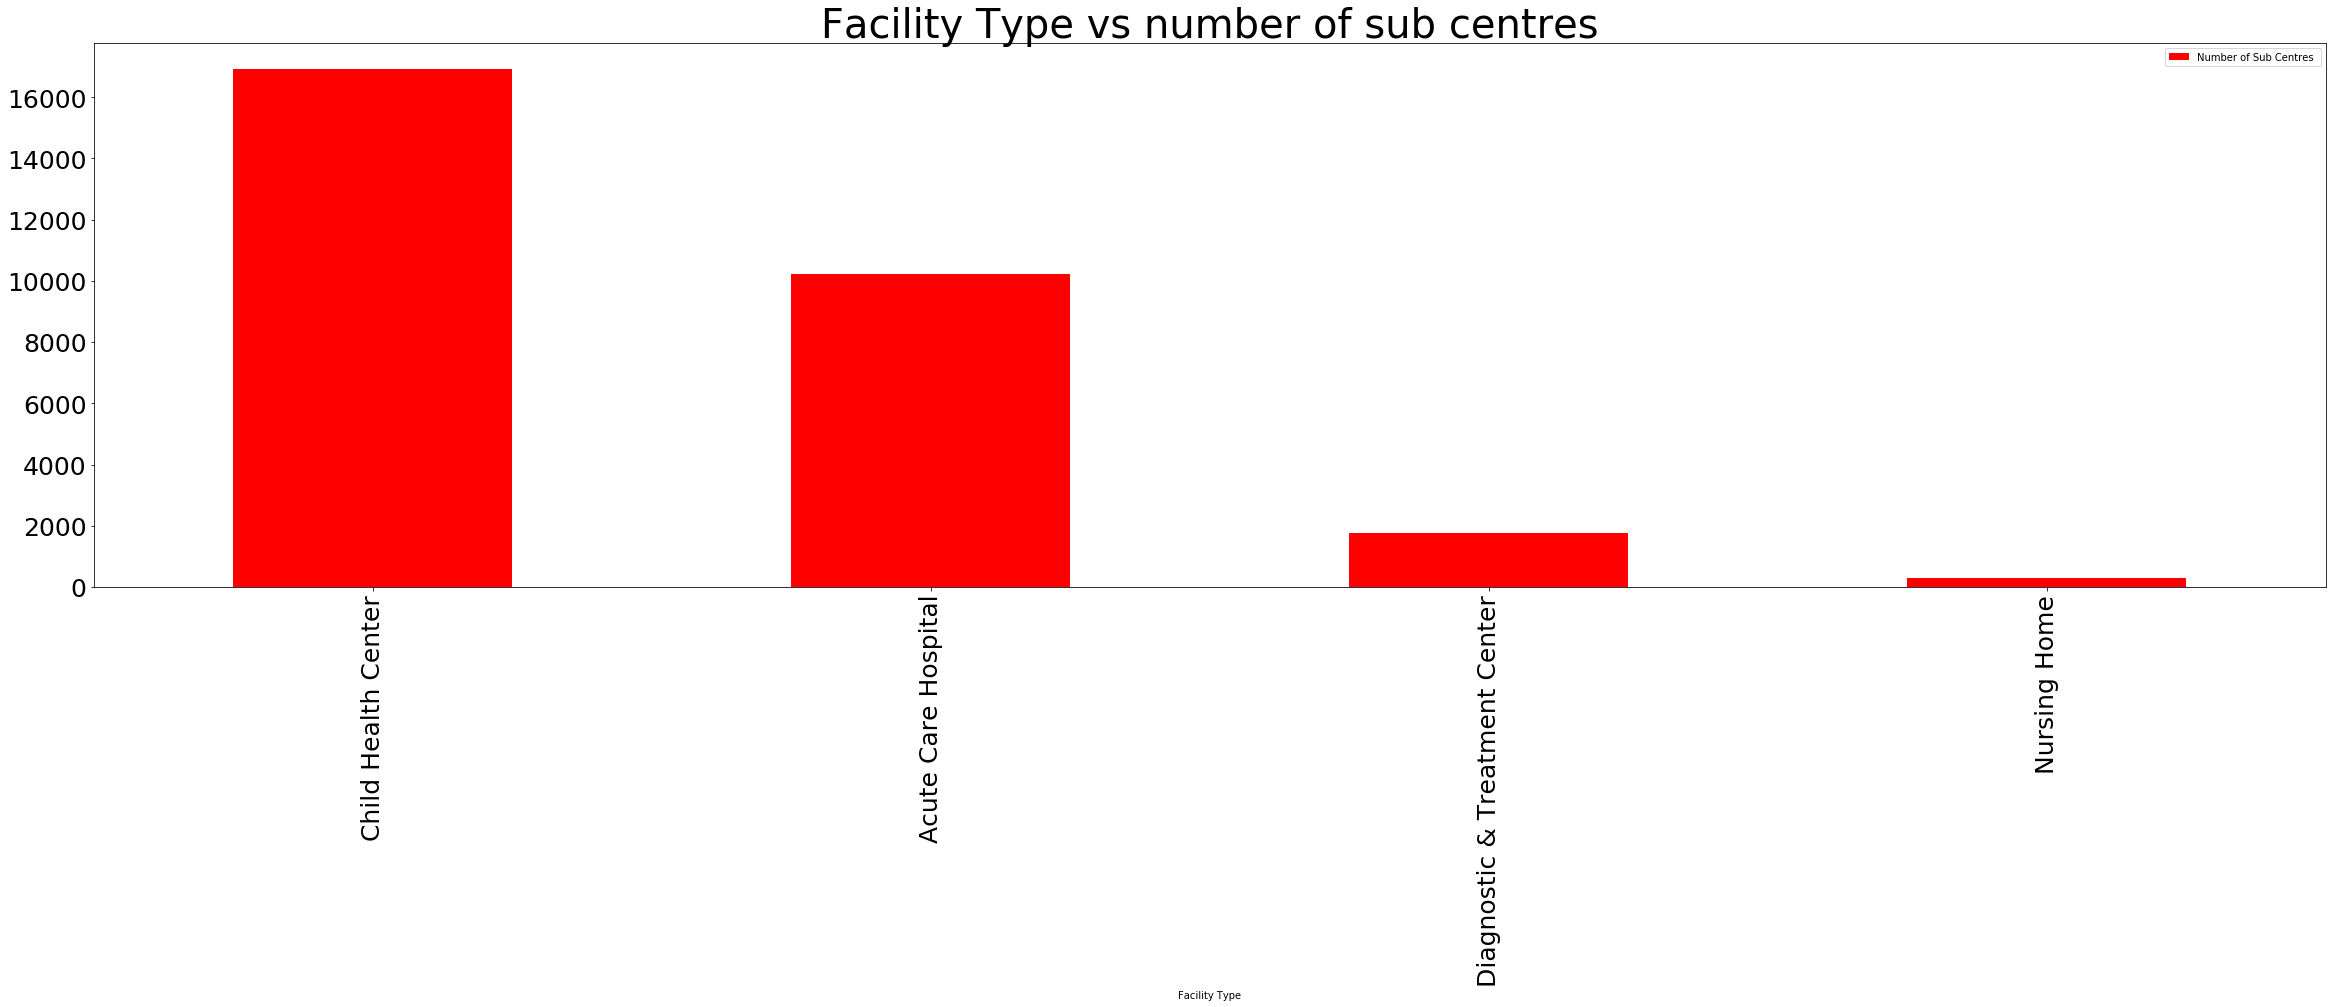

In [30]:
#visualizing the plot between number of subcentres and facility types
facility_number = data[['Facility Type','Number of Sub Centres ']].groupby(['Facility Type']).sum().sort_values(by='Number of Sub Centres ', ascending=False)
facility_number.plot(kind='bar', figsize=(40,10), fontsize=25,color='red').set_title('Facility Type vs number of sub centres',fontsize=40)

Text(0.5, 1.0, 'Facility Name vs number of sub centres')

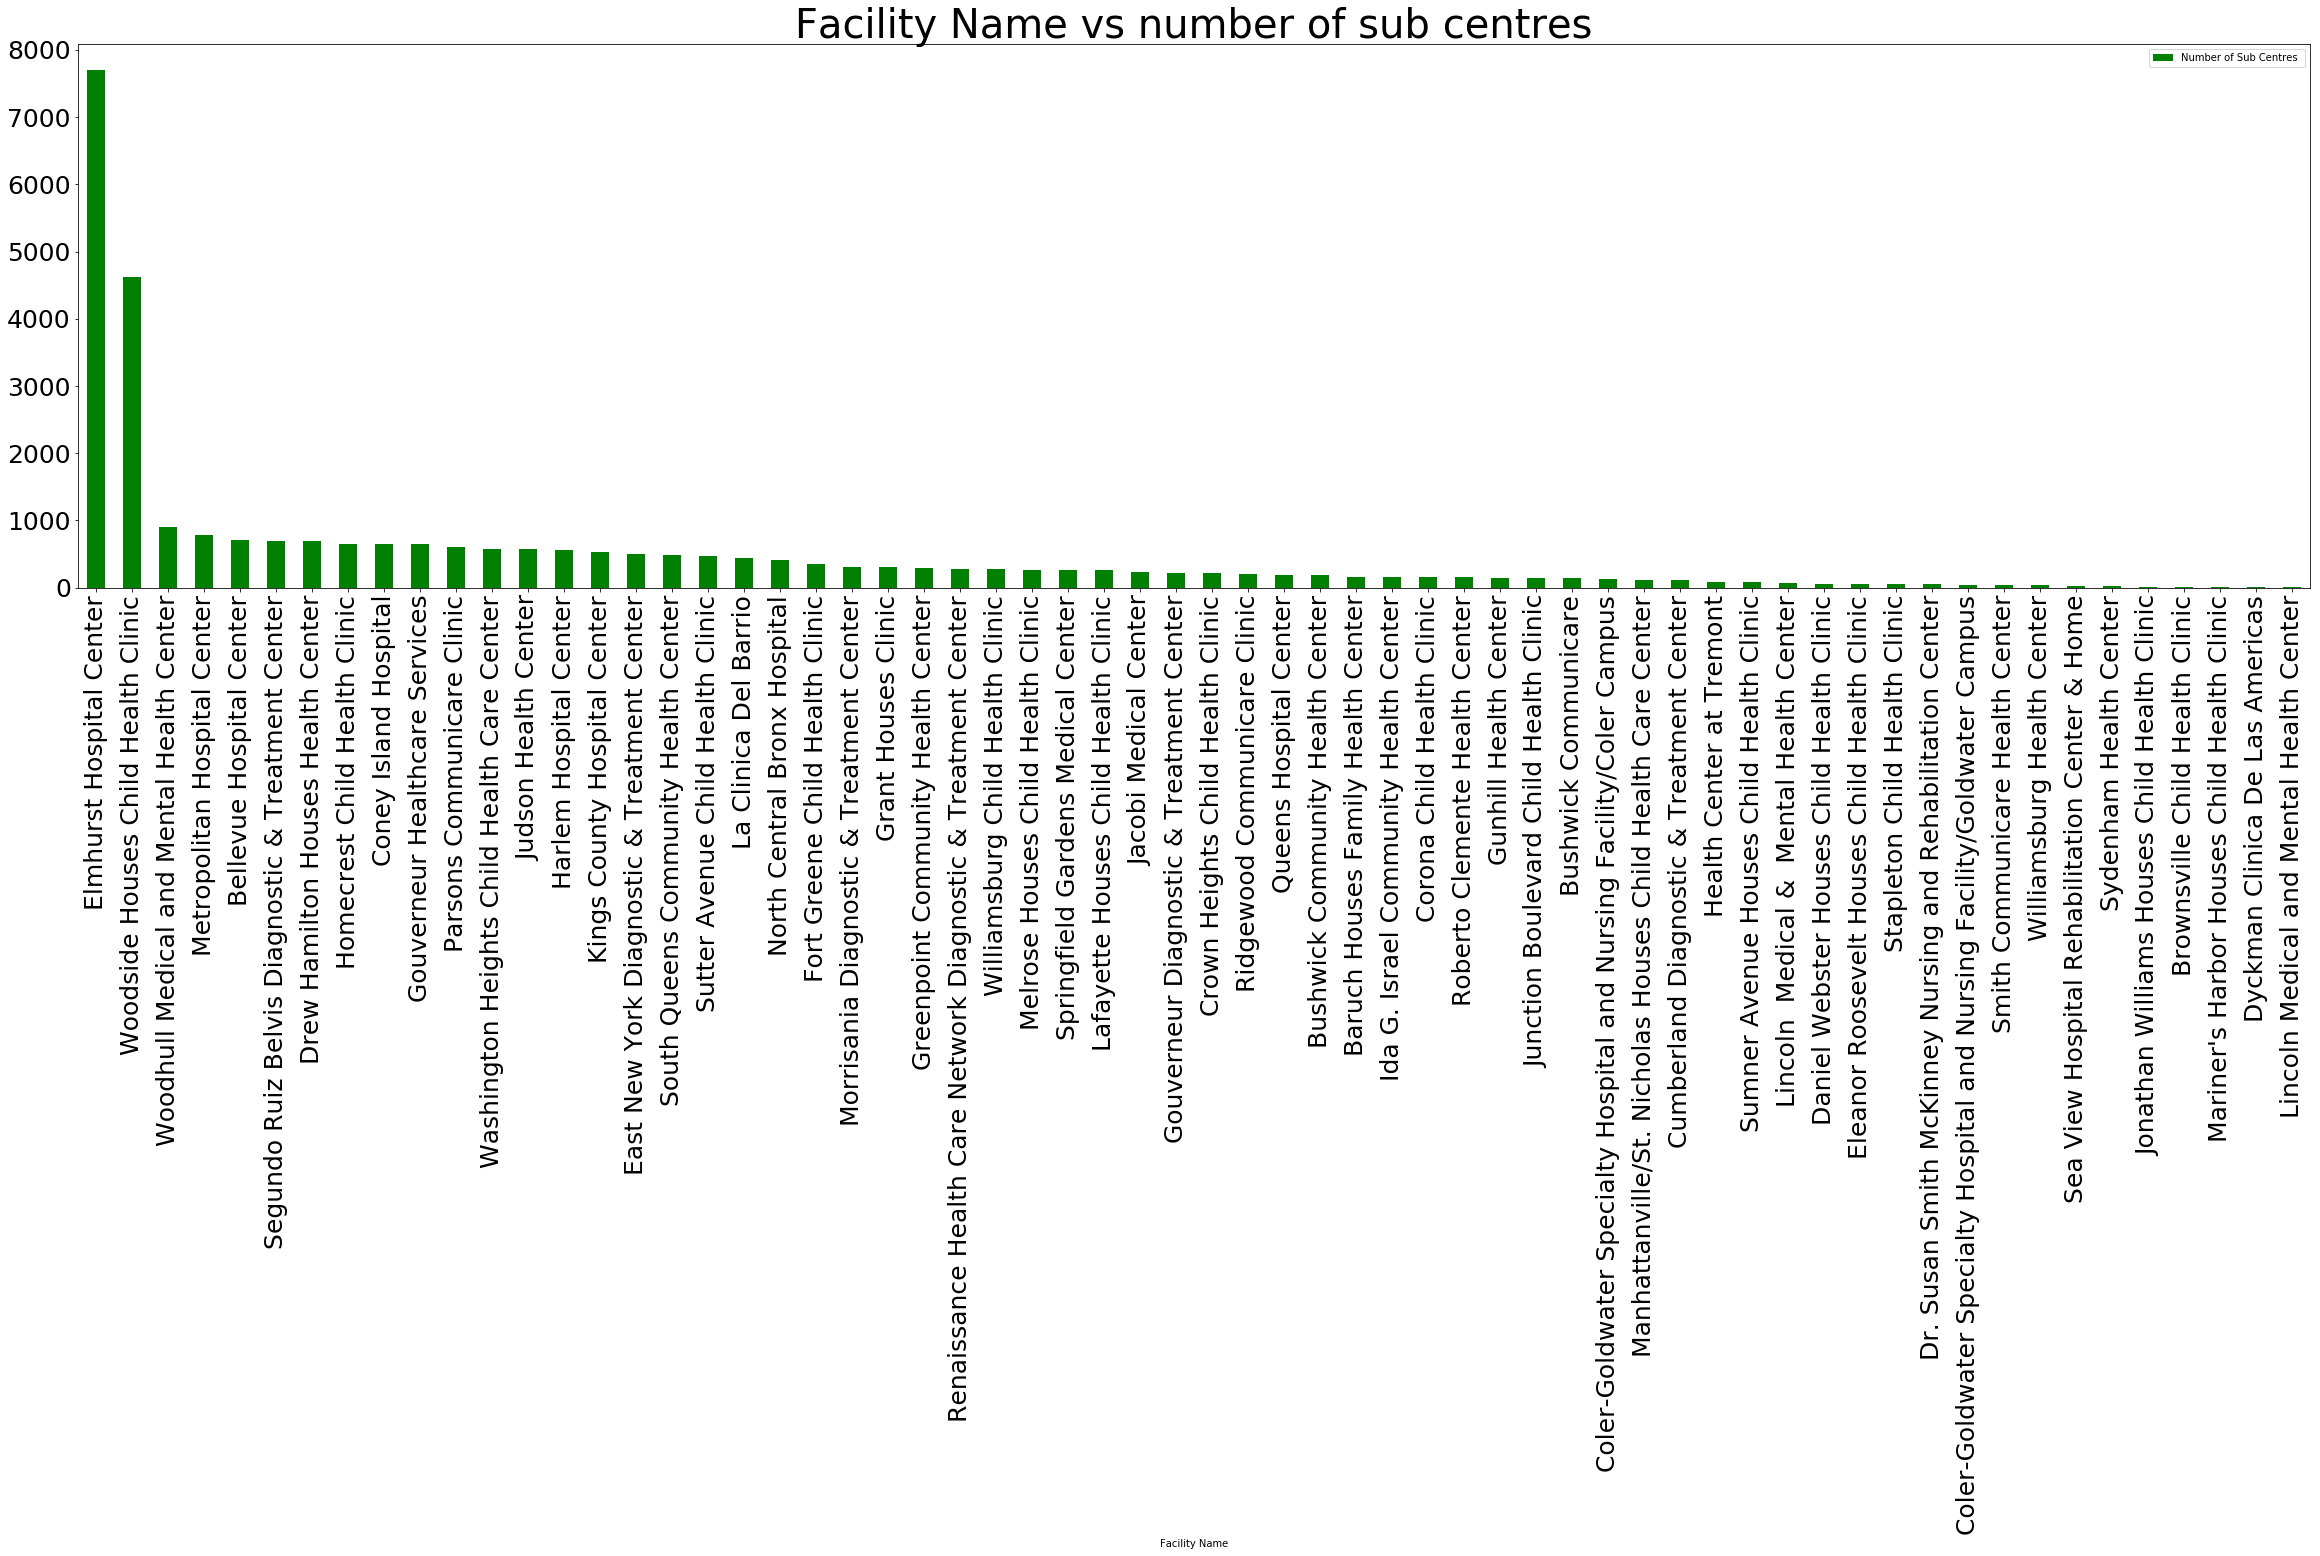

In [31]:
#visualizing the plot between number of subcentres and facility names
facility_number = data[['Facility Name','Number of Sub Centres ']].groupby(['Facility Name']).sum().sort_values(by='Number of Sub Centres ', ascending=False)
facility_number.plot(kind='bar', figsize=(40,10), fontsize=25,color='green').set_title('Facility Name vs number of sub centres',fontsize=40)

Text(0.5, 1.0, 'borough vs number of sub divisional hospitals')

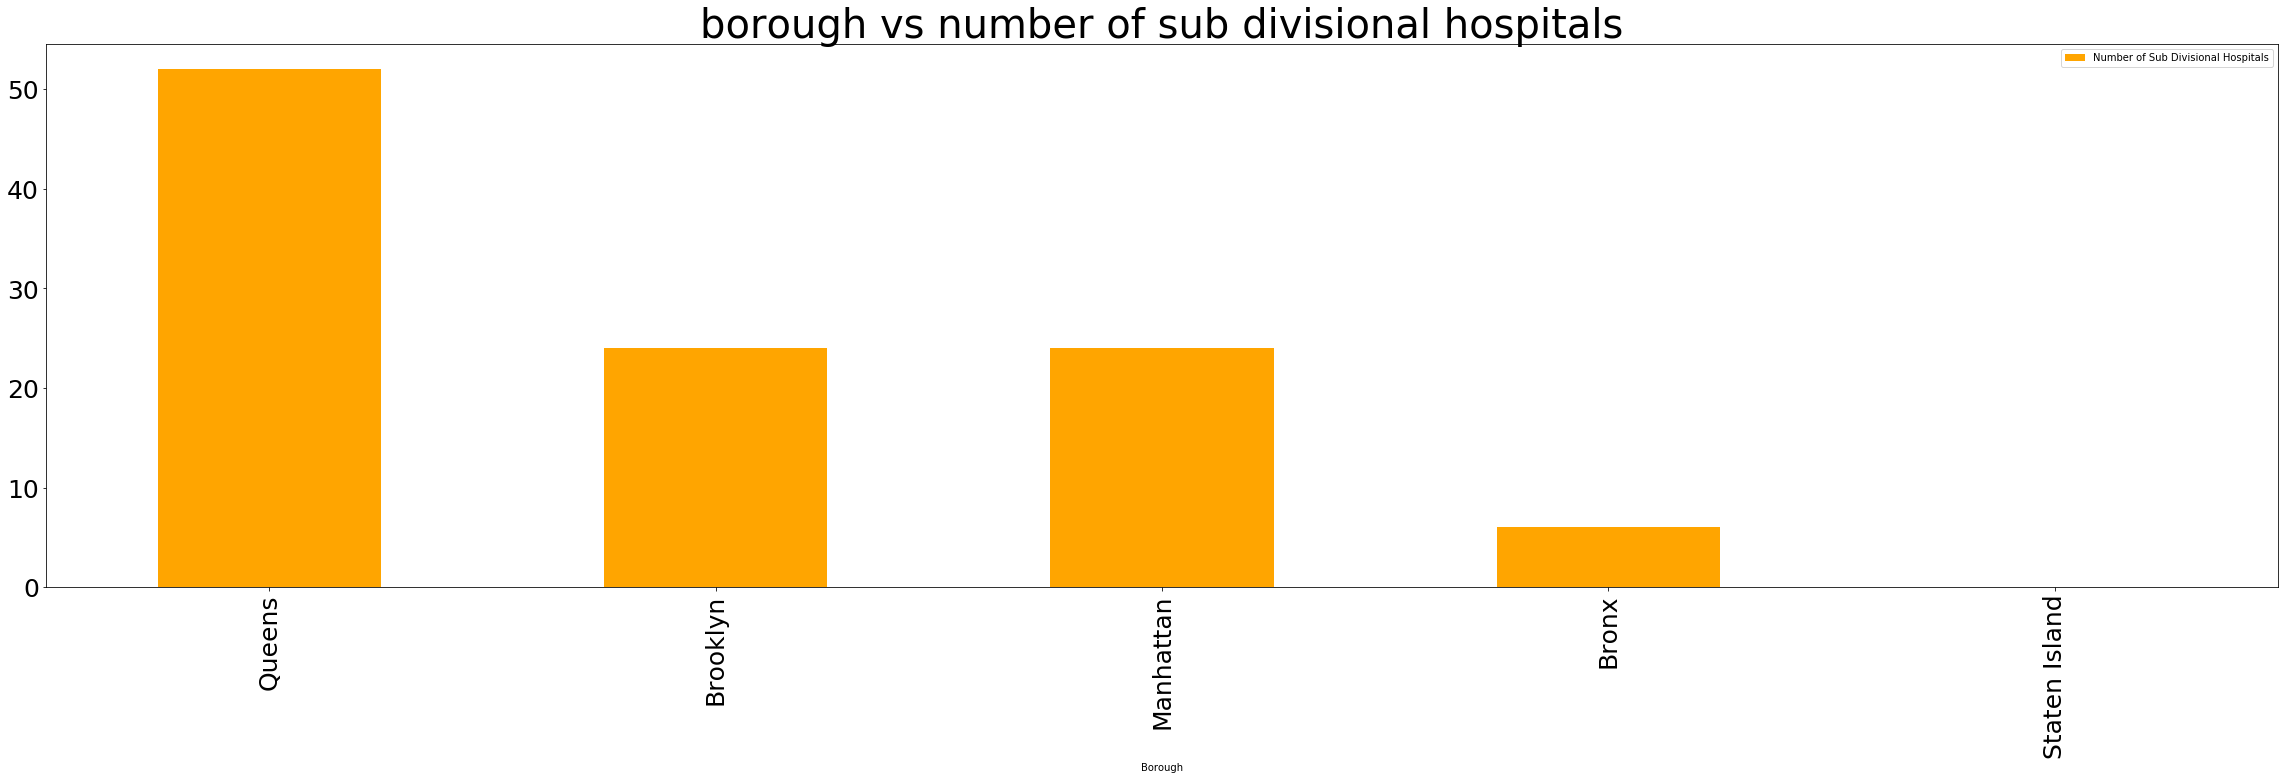

In [32]:
#visualizing the plot between number of sub divisional hospitals and borough
facility_number = data[['Borough','Number of Sub Divisional Hospitals']].groupby(['Borough']).sum().sort_values(by='Number of Sub Divisional Hospitals', ascending=False)
facility_number.plot(kind='bar', figsize=(40,10), fontsize=25,color='orange').set_title('borough vs number of sub divisional hospitals',fontsize=40)


Text(0.5, 1.0, 'Facility Name vs number of sub divisional hospitals')

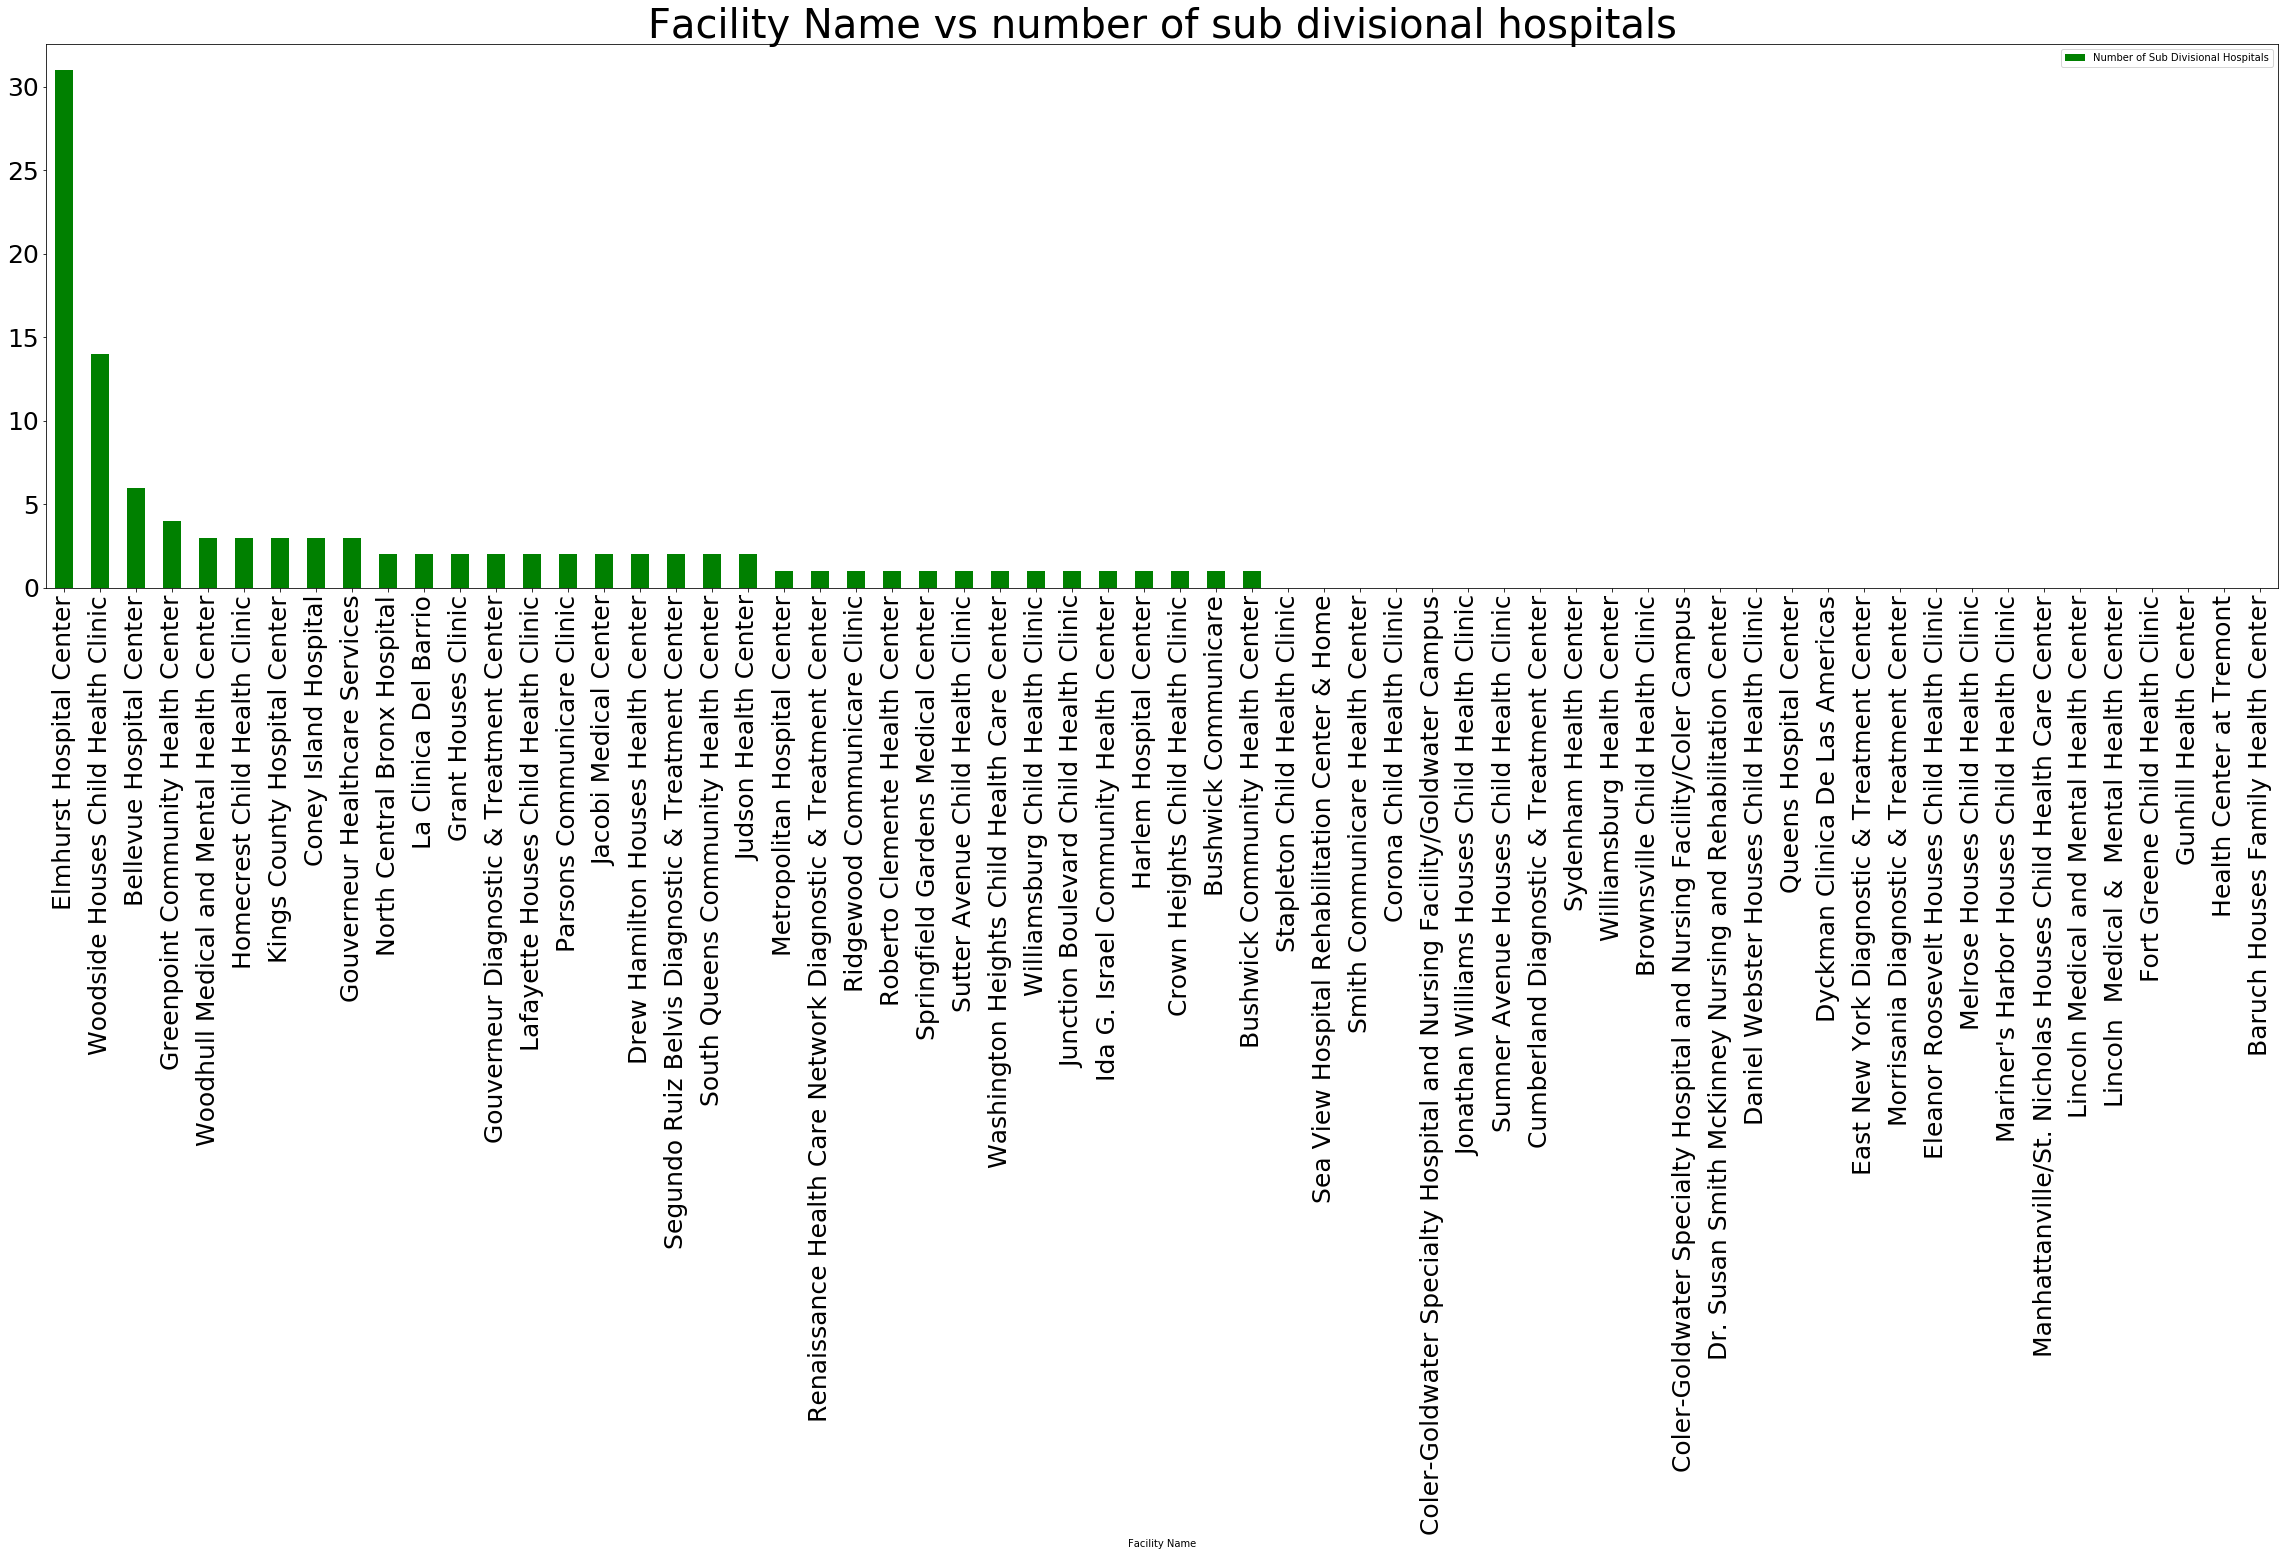

In [33]:
#visualizing the plot between number of subcentres and facility names
facility_number = data[['Facility Name','Number of Sub Divisional Hospitals']].groupby(['Facility Name']).sum().sort_values(by='Number of Sub Divisional Hospitals', ascending=False)
facility_number.plot(kind='bar', figsize=(40,10), fontsize=25,color='green').set_title('Facility Name vs number of sub divisional hospitals',fontsize=40)

Text(0.5, 1.0, 'Facility Type vs number of sub divisional hospitals')

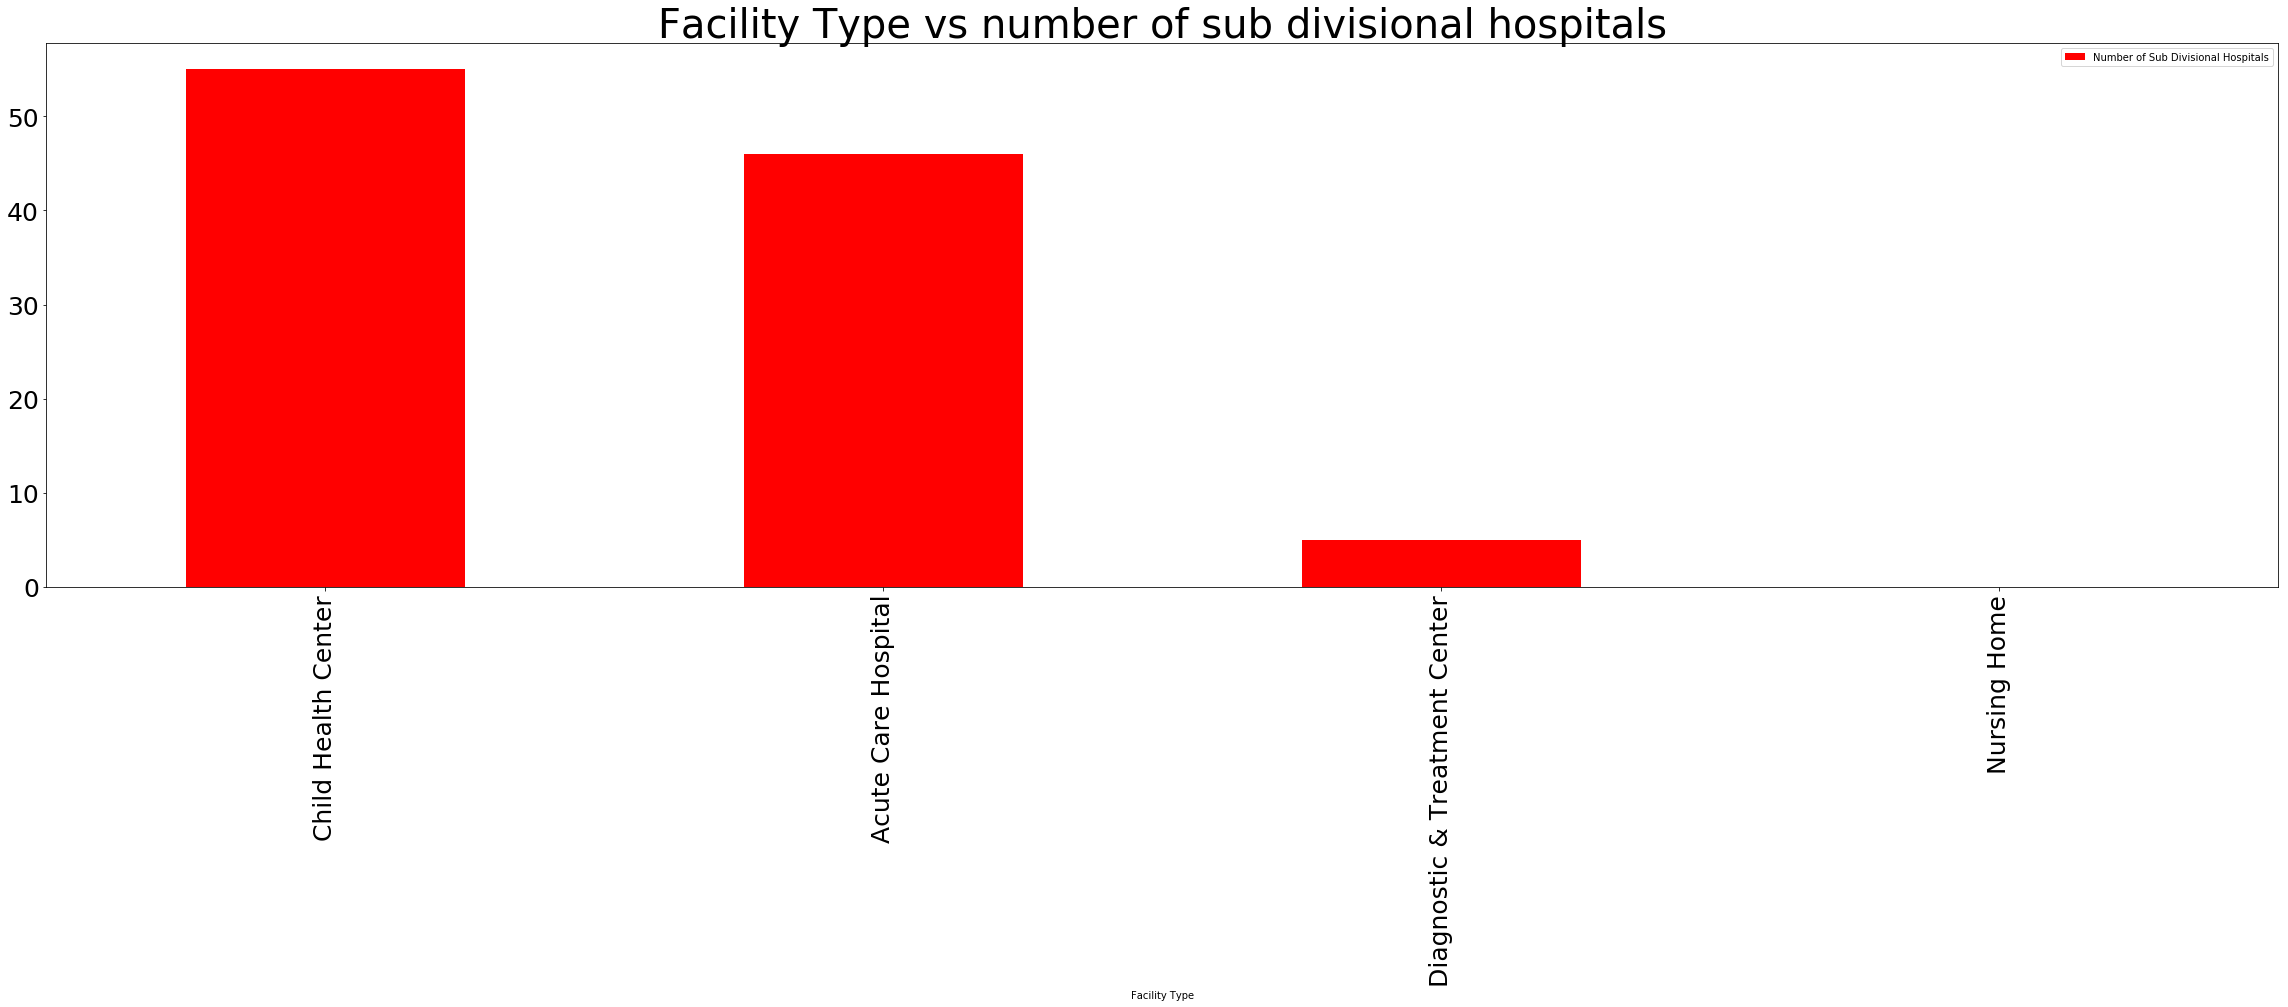

In [34]:
#visualizing the plot between number of subcentres and facility types
facility_number = data[['Facility Type','Number of Sub Divisional Hospitals']].groupby(['Facility Type']).sum().sort_values(by='Number of Sub Divisional Hospitals', ascending=False)
facility_number.plot(kind='bar', figsize=(40,10), fontsize=25,color='red').set_title('Facility Type vs number of sub divisional hospitals',fontsize=40)

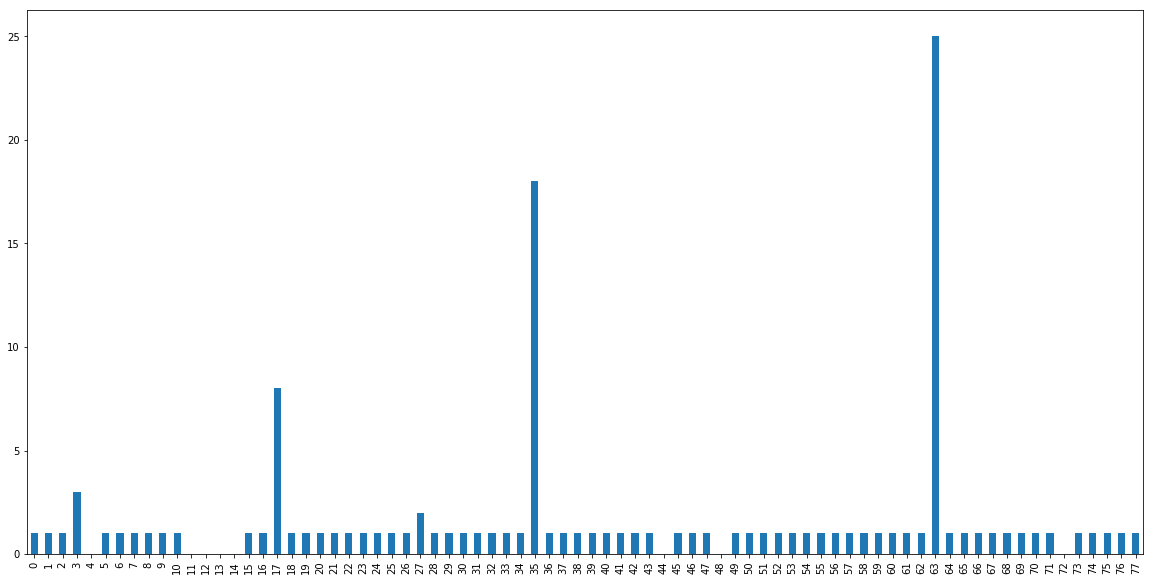

In [35]:
data['Number of District Hospital'].plot.bar()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
data=pd.get_dummies(data)

In [38]:
y=data['Number of Sub Centres ']

In [39]:
X_train, X_test, y_train, y_test=train_test_split(data,y, test_size=0.8,random_state=0)

In [40]:
x_train=data.drop('Number of Sub Centres ',axis=1)

In [41]:
x_test=data.drop('Number of Sub Centres ',axis=1)

In [42]:
y_train=data['Number of Sub Centres ']

In [43]:
y_test=data['Number of Sub Centres ']

# model building

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
x_train.fillna(0,inplace=True)

In [47]:
x_test.fillna(0,inplace=True)

In [48]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
x_train=pd.get_dummies(x_train)

In [50]:
x_test=pd.get_dummies(x_test)

In [51]:
pred=lm.predict(x_train)

prediction values

In [52]:
pred.sum()

29186.87890625

# # decision tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor(max_depth=5)

In [48]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
predict = dt_reg.predict(x_test)

In [50]:
predict

array([  91.87804878,   91.87804878,   91.87804878,   91.87804878,
        618.5       ,  618.5       ,  217.69230769,  837.        ,
        689.        ,  526.        ,  576.        ,  526.        ,
        618.5       ,  526.        ,  307.125     ,  470.        ,
        618.5       , 7659.        ,   91.87804878,   91.87804878,
         91.87804878,   91.87804878,   91.87804878,   91.87804878,
         91.87804878,   91.87804878,   91.87804878,   91.87804878,
         91.87804878,   91.87804878,   91.87804878,   91.87804878,
         91.87804878,   91.87804878,   91.87804878,  588.        ,
        217.69230769,   91.87804878,   91.87804878,   91.87804878,
         91.87804878,   91.87804878,   91.87804878,  307.125     ,
         91.87804878,   91.87804878,  217.69230769,   91.87804878,
        307.125     ,  217.69230769,   91.87804878,  217.69230769,
         91.87804878,  217.69230769,  217.69230769,   91.87804878,
        354.        ,   91.87804878,   91.87804878,  307.125  

# R2 value

In [51]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [52]:
# calculating rmsle of the predicted values
rmsle(y_test, predict)

77.20859415250278